In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
pwd()

'C:\\Users\\denny\\Desktop'

In [6]:
klaim = pd.read_csv('tsa_claims_ujian.csv')

In [7]:
klaim.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [8]:
klaim2=klaim[klaim['Close Amount'].isna()]

In [9]:
klaim3=klaim2[klaim2['Disposition'].isna()]
klaim3.tail(5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [10]:
klaim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [11]:
klaim.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [12]:
klaimDesc = []
for i in klaim.columns:
    klaimDesc.append([i, 
                      klaim[i].dtypes, 
                      klaim[i].isna().sum(), 
                      round((((klaim[i].isna().sum())/(len(klaim)))*100),2), 
                      klaim[i].nunique(),
                      klaim[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(klaimDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2004061455654, 2005092393184]"
1,Date Received,object,70,0.14,3522,"[24-Dec-12, 13-Sep-05]"
2,Incident Date,object,570,1.12,10788,"[5/21/2012 16:20, 6/25/2011 0:00]"
3,Airport Code,object,2052,4.02,405,"[nan, EWR]"
4,Airport Name,object,2052,4.02,419,"[Bob Hope, Columbia; MO]"
5,Airline Name,object,8555,16.75,243,"[EVA airlines, Midwest Express Airlines]"
6,Claim Type,object,1960,3.84,8,"[Personal Injury, Passenger Property Loss]"
7,Claim Site,object,190,0.37,6,"[Other, Bus Station]"
8,Item,object,1012,1.98,1854,[Jewelry & Watches; Jewelry & Watches; Jewelry...
9,Claim Amount,object,992,1.94,13248,"[$252.02 , $283.00 ]"


In [13]:
klaim.replace('-',np.nan,inplace=True)

In [14]:
klaim

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,22-Oct-15,19-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN


In [15]:
klaim['Claim Amount']

0           $50.00 
1        $2;270.09 
2          $200.00 
3           $21.44 
4        $1;832.22 
            ...    
51061           NaN
51062           NaN
51063           NaN
51064           NaN
51065           NaN
Name: Claim Amount, Length: 51066, dtype: object

In [16]:
# klaim['Date Received'] = pd.to_datetime(klaim['Date Received'])


In [17]:
# klaim['Claim Amount']=klaim['Claim Amount'].str.replace('$','')

# klaim.fillna(0, inplace = False)

In [18]:
klaim['Claim Amount']=klaim['Claim Amount'].str.replace(';','')
klaim['Claim Amount']=klaim['Claim Amount'].str.replace('$','')
klaim['Claim Amount']

0          50.00 
1        2270.09 
2         200.00 
3          21.44 
4        1832.22 
           ...   
51061         NaN
51062         NaN
51063         NaN
51064         NaN
51065         NaN
Name: Claim Amount, Length: 51066, dtype: object

In [19]:
klaim['Claim Amount']=klaim['Claim Amount'].astype('float')
klaim['Close Amount']

0        $50.00 
1            NaN
2         $0.00 
3        $21.00 
4         $0.00 
          ...   
51061        NaN
51062        NaN
51063        NaN
51064        NaN
51065        NaN
Name: Close Amount, Length: 51066, dtype: object

In [20]:
klaim['Claim Amount'].describe()

count    4.688600e+04
mean     4.407323e+03
std      5.807553e+05
min      0.000000e+00
25%      2.702250e+01
50%      1.135100e+02
75%      3.495775e+02
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [21]:
# sum(klaim['Claim Amount'].isna())

In [22]:
klaim['Close Amount']=klaim['Close Amount'].str.replace('$','')
klaim['Close Amount']=klaim['Close Amount'].str.replace(';','')
klaim['Close Amount']

0        50.00 
1           NaN
2         0.00 
3        21.00 
4         0.00 
          ...  
51061       NaN
51062       NaN
51063       NaN
51064       NaN
51065       NaN
Name: Close Amount, Length: 51066, dtype: object

In [23]:
klaim['Close Amount']=klaim['Close Amount'].astype('float')
klaim['Close Amount']

0        50.0
1         NaN
2         0.0
3        21.0
4         0.0
         ... 
51061     NaN
51062     NaN
51063     NaN
51064     NaN
51065     NaN
Name: Close Amount, Length: 51066, dtype: float64

In [24]:
klaim['Close Amount'].describe()

count     33786.000000
mean        101.841162
std        1468.609392
min           0.000000
25%           0.000000
50%           0.000000
75%          70.000000
max      250000.000000
Name: Close Amount, dtype: float64

In [25]:
# sum(klaim['Close Amount'].isna())

In [26]:
klaim['Amount Differences']= klaim['Claim Amount']-klaim['Close Amount']

In [27]:
klaim

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Amount Differences
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,0.00
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,200.00
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,0.44
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,1832.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,22-Oct-15,19-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,NaN


In [28]:
klaim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 14 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null object
Incident Date         50496 non-null object
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Amount Differences    33470 non-null float64
dtypes: float64(3), object(11)
memory usage: 5.5+ MB


In [29]:
klaim.dropna(subset=['Amount Differences'])

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Amount Differences
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,0.00
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.00,Deny,200.00
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.00,Approve in Full,0.44
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,1832.22
6,18202,16-Sep-02,8/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,NaN,NaN,Checkpoint,Computer - Laptop,678.00,Approved,678.00,Approve in Full,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36243,2010010667221,30-Dec-09,12/1/2009 16:40,AUS,Austin-Bergstrom International Airport,Alaska Airlines,Property Damage,Checked Baggage,Medical Equipment & Insturments,80.00,Settled,72.00,Settle,8.00
36244,2010010867347,30-Dec-09,11/2/2009 0:00,ORD,Chicago O'Hare International Airport,UAL,Passenger Property Loss,Checked Baggage,DVD/CD Players; Handbags & Purses (leather or ...,546.95,Settled,514.73,Settle,32.22
36245,2010010867360,30-Dec-09,12/14/2009 8:30,SJU,Luis Munoz Marin International,American Airlines,Property Damage,Checked Baggage,Alcoholic beverages; Cosmetics - Perfume; toil...,185.00,Settled,179.23,Settle,5.77
36246,2010010667197,31-Dec-09,12/10/2009 12:40,DEN,Denver International Airport,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,70.00,Approved,70.00,Approve in Full,0.00


In [30]:
klaim

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Amount Differences
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,0.00
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,200.00
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,0.44
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,1832.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,22-Oct-15,19-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,NaN


In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Amount Differences Distribution')

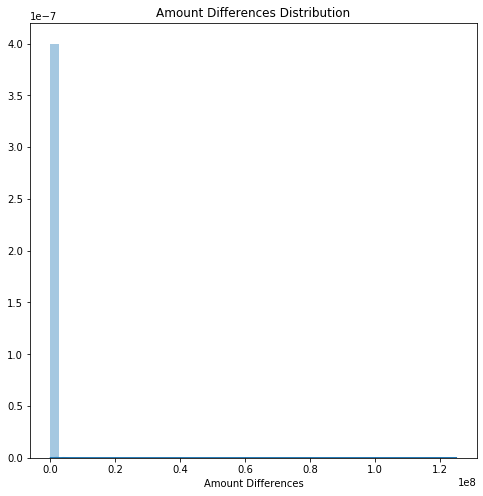

In [32]:
plt.figure(figsize=(8,8))
sns.distplot(klaim['Amount Differences'].dropna())
plt.title('Amount Differences Distribution')

In [33]:
Q1_amount = klaim['Amount Differences'].dropna().describe()['25%']
Q3_amount = klaim['Amount Differences'].dropna().describe()['75%']
IQR = Q3_amount - Q1_amount
IQR

340.0

In [34]:
Q1_amount - (1.5*IQR)

-510.0

In [35]:
Q3_amount + (1.5 * IQR)

850.0

In [36]:
klaim[(klaim['Amount Differences'] <= Q1_amount - (1.5*IQR)) | (klaim['Amount Differences'] >= Q3_amount + (1.5 * IQR))]['Amount Differences']

4        1832.22
13       2000.00
21       1400.00
23       1510.32
27       7500.00
          ...   
36208    2200.00
36210     900.00
36213    1240.00
36225    2300.00
36232    3650.00
Name: Amount Differences, Length: 4130, dtype: float64

In [37]:
klaimoutlier = klaim[klaim['Amount Differences']> Q3_amount + (1.5 * IQR) ]
klaimoutlier

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Amount Differences
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,1832.22
13,19133,2-Oct-02,8/22/2002 0:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,2000.00
21,18614,17-Oct-02,9/14/2002 0:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,1400.00
23,18356,23-Oct-02,9/18/2002 0:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,1510.32
27,21817,29-Oct-02,10/5/2002 0:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,29-Dec-09,12/18/2009 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,2200.00
36210,2009123167017,29-Dec-09,12/2/2009 15:30,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,900.00
36213,2010010867323,29-Dec-09,12/21/2009 15:15,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,1240.00
36225,2009123066912,30-Dec-09,12/15/2009 0:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,2300.00


In [38]:
klaimoutlier['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [39]:
klaimoutlier['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

In [40]:
klaim['Amount Differences'].describe()

count    3.347000e+04
mean     5.217843e+03
std      6.843299e+05
min     -4.311000e+02
25%      0.000000e+00
50%      9.629000e+01
75%      3.400000e+02
max      1.250000e+08
Name: Amount Differences, dtype: float64

In [41]:
klaim

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Amount Differences
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,0.00
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,200.00
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,0.44
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,1832.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,22-Oct-15,19-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,NaN


## Question I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 


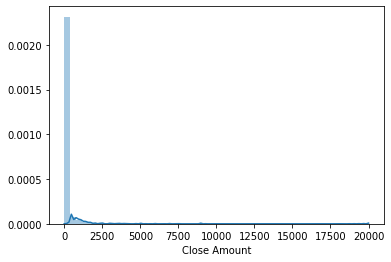

In [42]:
sns.distplot(klaim[(klaim['Amount Differences'] < Q1_amount - (1.5*IQR)) | (klaim['Amount Differences'] > Q3_amount+(1.5*IQR))]['Close Amount'])

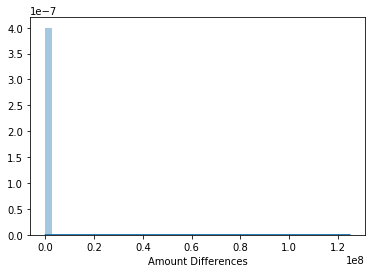

In [43]:
sns.distplot(klaim['Amount Differences'].dropna())

In [44]:
# dapat kitqa lihat data kita dalah bukan normal distribusi

In [45]:
klaim['Item'].value_counts().nlargest(60)

Other                                                                                                       9183
Luggage (all types including footlockers)                                                                   4818
Clothing - Shoes; belts; accessories; etc.                                                                  3761
Jewelry - Fine                                                                                              2488
Locks                                                                                                       2408
Cameras - Digital                                                                                           2280
Computer - Laptop                                                                                           2146
Baggage/Cases/Purses                                                                                        1513
Computer & Accessories                                                                          

In [46]:
klaim.groupby('Item').mean()['Claim Amount']

Item
Alcoholic beverages                                                                                                                                                                         87.263000
Alcoholic beverages; Books - Fiction; paperbacks; magazines; etc.; Boxes - Jewelry; Cigarette; Music; etc.; Jewelry - Fine                                                                 400.000000
Alcoholic beverages; Books - Other (Hardcover non-fiction); Clothing - Shoes; belts; accessories; etc.; Photographic Film; Sporting Equipment & Supplies (footballs; parachutes; etc.)     409.500000
Alcoholic beverages; Cameras - Digital                                                                                                                                                     427.500000
Alcoholic beverages; Cameras - Digital; Cameras - Non-electronic (Camera supplies; lenses; projectors; etc.)                                                                               265.000000
     

In [47]:
klaim['Disposition'].value_counts()

Deny               17147
Approve in Full     8727
Settle              6972
Name: Disposition, dtype: int64

In [48]:
from pingouin import kruskal
kruskal(data = klaim, dv = 'Claim Amount', between = 'Disposition' )

,Source,ddof1,H,p-unc
Kruskal,Disposition,2,5399.11,0.0


In [49]:
from pingouin import pairwise_ttests
pairwise_ttests(data =  klaim, dv = 'Claim Amount', between = 'Disposition', parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,Disposition,Approve in Full,Deny,False,False,35775923.0,two-sided,0.000000e+00,-0.014
1,Disposition,Approve in Full,Settle,False,False,12917418.0,two-sided,0.000000e+00,-0.208
2,Disposition,Deny,Settle,False,False,61403969.5,two-sided,9.824820e-07,0.013


In [50]:
kruskal(data =  klaim, dv = 'Close Amount', between = 'Disposition' )

,Source,ddof1,H,p-unc
Kruskal,Disposition,2,27147.694,0.0


In [51]:
pairwise_ttests(data =  klaim, dv = 'Close Amount', between = 'Disposition', parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,Disposition,Approve in Full,Deny,False,False,144303697.5,two-sided,0.000000e+00,0.080
1,Disposition,Approve in Full,Settle,False,False,22512606.5,two-sided,1.859331e-168,-0.174
2,Disposition,Deny,Settle,False,False,1046723.5,two-sided,0.000000e+00,-0.127


In [52]:
kruskal(data =  klaim, dv = 'Amount Differences', between = 'Disposition' )

,Source,ddof1,H,p-unc
Kruskal,Disposition,2,19758.056,0.0


In [53]:
pairwise_ttests(data =  klaim, dv = 'Amount Differences', between = 'Disposition', parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,Disposition,Approve in Full,Deny,False,False,1170867.5,two-sided,0.0,-0.013
1,Disposition,Approve in Full,Settle,False,False,301350.0,two-sided,0.0,-0.194
2,Disposition,Deny,Settle,False,False,78029980.5,two-sided,0.0,0.012


## dari analisis statistik diatas ,kita dapat menyimpulkan,that there are significant differences of Claim Value that is fully approved, settled, and denied. These things tell us that Claim Amount can affect TSA's disposition on passanger's claim. From differences between Close Amount and Disposition we also can conclude that difference between claim ammount and claims that given to passanger's also differs, which means there are impacts on claim value to disposition.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

In [54]:
klaim[klaim['Airport Code']=='MIA']['Claim Type'].value_counts()

Passenger Property Loss    997
Property Damage            529
Personal Injury             10
Passenger Theft              6
Employee Loss (MPCECA)       5
Motor Vehicle                1
Name: Claim Type, dtype: int64

In [55]:
klaim[klaim['Airport Code']=='JFK']['Claim Type'].value_counts()

Passenger Property Loss    1607
Property Damage             599
Personal Injury              16
Passenger Theft               6
Motor Vehicle                 3
Employee Loss (MPCECA)        2
Name: Claim Type, dtype: int64

In [56]:
klaim[klaim['Airport Code']=='BOS']['Claim Type'].value_counts()

Passenger Property Loss    606
Property Damage            371
Personal Injury              8
Employee Loss (MPCECA)       2
Motor Vehicle                1
Name: Claim Type, dtype: int64

In [57]:
klaim[klaim['Airport Code']=='LAX']['Claim Type'].value_counts()

Passenger Property Loss    1452
Property Damage             803
Personal Injury              10
Passenger Theft               6
Employee Loss (MPCECA)        5
Motor Vehicle                 3
Name: Claim Type, dtype: int64

In [58]:
klaim[klaim['Airline Name']=='American Airlines']['Claim Type'].value_counts()

Passenger Property Loss    2646
Property Damage            1507
Personal Injury              24
Passenger Theft              17
Employee Loss (MPCECA)       16
Complaint                     1
Name: Claim Type, dtype: int64

In [59]:
klaim[klaim['Airline Name']=='UAL']['Claim Type'].value_counts()

Passenger Property Loss    2072
Property Damage            1280
Personal Injury              19
Employee Loss (MPCECA)        7
Passenger Theft               5
Motor Vehicle                 1
Complaint                     1
Name: Claim Type, dtype: int64

## dapat kita lihat dari analisis diatas tidak terdapat perbedaan pola yang siginifikan dari jenis airline name dan juga jenis claim typenya,dari data diatas semua nya didominasi oleh yang pertama adalah passager loss dan kedua adalah property Damage

## sekarang mari kita analisis dari segini bandaranya

In [60]:
pd.set_option('display.max_rows', None)
klaim['Airport Name'].value_counts()

John F. Kennedy International                       2286
Los Angeles International Airport                   1813
Newark International Airport                        1747
Chicago O'Hare International Airport                1712
Orlando International Airport                       1633
Miami International Airport                         1613
Hartsfield-Jackson Atlanta International Airport    1525
Seattle-Tacoma International                        1330
McCarran International                              1278
Phoenix Sky Harbor International                    1267
Philadelphia International Airport                  1143
Ft. Lauderdale-Hollywood International              1032
Washington Dulles International                      981
Dallas-Fort Worth International Airport              854
Tampa International                                  844
Minneapolis/ St.Paul International Airport           807
Houston - George Bush Intercontinental Airport       800
LaGuardia                      

### Dapat kita lihat dari banyaknya data diatas Nama bandara yang memiliki data Claim terbanyak adalah John F. Kennedy International,Bandara Internasional John F. Kennedy adalah bandara internasional yang terletak di Jamaica, Queens, Kota New York, Negara Bagian New York, Amerika Serikat. Bandara ini merupakan salah satu gerbang masuk ke Amerika Serikat yang utama,maka dari itu tidak heran jika banyak sekali jadwal penerbangan yang melintas dan lalu lalang,hal ini tentunya menjadi salah satu alasan kenapa banyak juga pelanggaan yang melakukan claim atas barang bawaan mereka,ada 2286 claim dari data diatas,selanjutnya mali kita lihat jenis claim apa saja yang paling banyak dilakukan oleh pelanggan

In [61]:
klaimbandara_kennedy = klaim[klaim['Airport Name'].str[0:] =='John F. Kennedy International']
klaimbandara_Honolu = klaim[klaim['Airport Name'].str[0:] =='Honolulu International Airport']

In [62]:

klaimbandara_kennedy

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Amount Differences
24,20930,25-Oct-02,10/2/2002 0:00,JFK,John F. Kennedy International,Jet Blue,Passenger Property Loss,Checkpoint,Jewelry - Fine,120.00,Approved,120.00,Approve in Full,0.00
49,20113,7-Nov-02,10/15/2002 0:00,JFK,John F. Kennedy International,American Airlines,Passenger Property Loss,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,700.00,Approved,700.00,Approve in Full,0.00
65,27128,15-Nov-02,9/13/2002 0:00,JFK,John F. Kennedy International,American Airlines,NaN,Other,Jewelry - Fine,330.45,Canceled,0.00,NaN,330.45
70,0715520M,20-Nov-02,10/16/2002 0:00,JFK,John F. Kennedy International,American Airlines,Passenger Property Loss,Checkpoint,Cameras - Digital,350.00,Approved,300.00,Approve in Full,50.00
82,20804,20-Nov-02,10/16/2002 0:00,JFK,John F. Kennedy International,NaN,NaN,Other,Jewelry - Fine,300.00,Canceled,0.00,NaN,300.00
128,20217,5-Dec-02,10/30/2002 0:00,JFK,John F. Kennedy International,NaN,NaN,Other,DVD/CD Players,71.44,Settled,35.72,Settle,35.72
131,0912801M,6-Dec-02,8/6/2002 0:00,JFK,John F. Kennedy International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,200.00,Settled,50.00,Settle,150.00
186,1217014L,17-Dec-02,12/4/2002 0:00,JFK,John F. Kennedy International,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),268.95,Settled,199.64,Settle,69.31
237,0703539M,30-Dec-02,11/14/2002 0:00,JFK,John F. Kennedy International,NaN,Property Damage,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,300.00,Approved,300.00,Approve in Full,0.00
244,1230010L,30-Dec-02,12/5/2002 0:00,JFK,John F. Kennedy International,NaN,NaN,Other,Jewelry - Fine,2750.00,Canceled,NaN,NaN,NaN


In [63]:
pd.set_option('display.max_rows', None)
klaimbandara_kennedy['Claim Type'].value_counts()

Passenger Property Loss    1607
Property Damage             599
Personal Injury              16
Passenger Theft               6
Motor Vehicle                 3
Employee Loss (MPCECA)        2
Name: Claim Type, dtype: int64

###  dari data diatas dapat kita lihat bahwa kehilangan barang merupakan claim yang sangat sering terjadi,yaitu 1607 kasus lebih dari setengah kasus claim yang ada di bandara kenedy tersebut,passanger property loss kadang terjadi jika label tujuan koper rusak,sehingga petugas salah memasukan tujuan bandara atau pesawat,selain itu bisa juga terjadi karena pelanggan yang lupa mengambil barangnya
### Kesalahan manusia juga bisa menjadi penyebab hilangnya bagasi, seperti ketika petugas memasuki bandara tujuan yang salah, atau jika tas Anda diletakkan di pesawat yang salah.

## sekarang mari kita lihat bandara lain yang lebih kecil dari kenedy dan jumlah claimny ahampir setengahnya dari kennedy yaitu bandara honululu

In [64]:
pd.set_option('display.max_rows', None)
klaimbandara_Honolu['Claim Type'].value_counts()

Passenger Property Loss    347
Property Damage            191
Personal Injury              4
Employee Loss (MPCECA)       3
Name: Claim Type, dtype: int64

klaimbandara_Angeles['Claim Type'].value_counts()

## dapat kita lihat dari analisis diatas tidak terdapat perbedaan pola yang siginifikan dari jenis nama bandara  dan juga jenis claim typenya,dari data diatas semua nya didominasi oleh yang pertama adalah passager loss dan kedua adalah property Damage,dapat disimpulkan tidak ada hubungan yang erat terkait jenis claim dan dan type claimnya dengan nama bandara dan juga nama airlinesnya


In [65]:
klaim['Status'].value_counts()

Denied                                                                                                                           17134
Approved                                                                                                                          8724
Deny                                                                                                                              7010
Settled                                                                                                                           6970
Approve in Full                                                                                                                   3165
Canceled                                                                                                                          1708
Settle                                                                                                                            1453
Insufficient; one of the following items required: sum 

### dari data diatas dapat diketahui TSA lebih sering mereject claim daripada menyetujuinya,menurut artikel yang pernah saya baca hal ini dikarenakan dalam proses claim tidak banyak bukti pendukung yang kuat dari penumpang sehingga hal ini terjadi

In [66]:
kruskal(data = klaim, dv = 'Claim Amount', between = 'Status' )

,Source,ddof1,H,p-unc
Kruskal,Status,10,22685.481,0.0


In [67]:
kruskal(data = klaim, dv = 'Close Amount', between = 'Status' )

,Source,ddof1,H,p-unc
Kruskal,Status,4,28655.688,0.0


In [68]:
kruskal(data = klaim, dv = 'Amount Differences', between = 'Status' )

,Source,ddof1,H,p-unc
Kruskal,Status,4,19985.58,0.0


In [69]:
klaim['Disposition'].value_counts()

Deny               17147
Approve in Full     8727
Settle              6972
Name: Disposition, dtype: int64

In [70]:
klaim[klaim['Status']=='Closed as a contractor claim']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Amount Differences
50,0715502M,7-Nov-02,8/18/2002 0:00,SAT,San Antonio International,UAL,Property Damage,Checkpoint,Photographic Film,1225.61,Closed as a contractor claim,NaN,NaN,NaN
342,0703553M,14-Jan-03,NaN,ROC,Greater Rochester International,NaN,NaN,Other,Luggage (all types including footlockers),NaN,Closed as a contractor claim,0.0,NaN,NaN
467,0127035L,27-Jan-03,9/25/2002 0:00,LGA,LaGuardia,NaN,Property Damage,Checkpoint,Other,1000.00,Closed as a contractor claim,NaN,NaN,NaN
655,0221000L,21-Feb-03,5/12/2002 0:00,LAX,Los Angeles International Airport,NaN,Property Damage,Checkpoint,Stereo Items & Accessories,500.00,Closed as a contractor claim,NaN,NaN,NaN
717,0225103L,25-Feb-03,12/18/2002 0:00,SFO,San Francisco International,UAL,Property Damage,Checkpoint,Computer - Laptop,650.00,Closed as a contractor claim,0.0,NaN,650.00
718,0714544M,25-Feb-03,1/28/2003 0:00,SFO,San Francisco International,Continental Airlines,Passenger Property Loss,Checked Baggage,Stereo Items & Accessories,2175.00,Closed as a contractor claim,0.0,NaN,2175.00
1170,0909818M,4-Apr-03,6/22/2002 0:00,SAN,San Diego International,Alaska Airlines,Passenger Property Loss,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Closed as a contractor claim,NaN,NaN,NaN
2257,0624501M,24-Jun-03,7/29/2002 0:00,PBI,Palm Beach International,NaN,NaN,Checked Baggage,Cell Phones,300.00,Closed as a contractor claim,NaN,NaN,NaN
2346,0626003M,26-Jun-03,6/14/2003 0:00,SFO,San Francisco International,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,197.07,Closed as a contractor claim,0.0,NaN,197.07
2697,0715025M,15-Jul-03,7/7/2002 0:00,JFK,John F. Kennedy International,Jet Blue,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),179.98,Closed as a contractor claim,NaN,NaN,NaN


## As mentioned earlier, there are effects on relationship between Disposition to Claim Amount, Close Amount and Amount Differences. Unlike dispositions, Status give us indifferences between groups. Mostly those are Cancelled, Denied, and Close as a Contractor Claim. in my opinion, this result occured because each status results in Clased Claim equals to 0.

## Bonus Question Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [71]:
klaim[['Disposition','Claim Amount']].sort_values(by='Claim Amount', ascending=False).nlargest(50, columns='Claim Amount')

,Disposition,Claim Amount
17190,Deny,1.250000e+08
27696,Deny,1.000000e+07
22010,Deny,5.000000e+06
32577,Deny,4.000000e+06
33704,NaN,2.000000e+06
14973,Deny,2.000000e+06
1419,Deny,2.000000e+06
34210,Deny,2.000000e+06
3860,Deny,2.000000e+06
17006,Deny,1.900010e+06


## from the analysis above,we got another information,we can see item categories also play part of this. we can compare price of the item on market to passangers claim. Then If we look properly, there are claims that expensive, but still settled. 

## I think it's safe to say that marking up the claim amount could affect the dispositions.